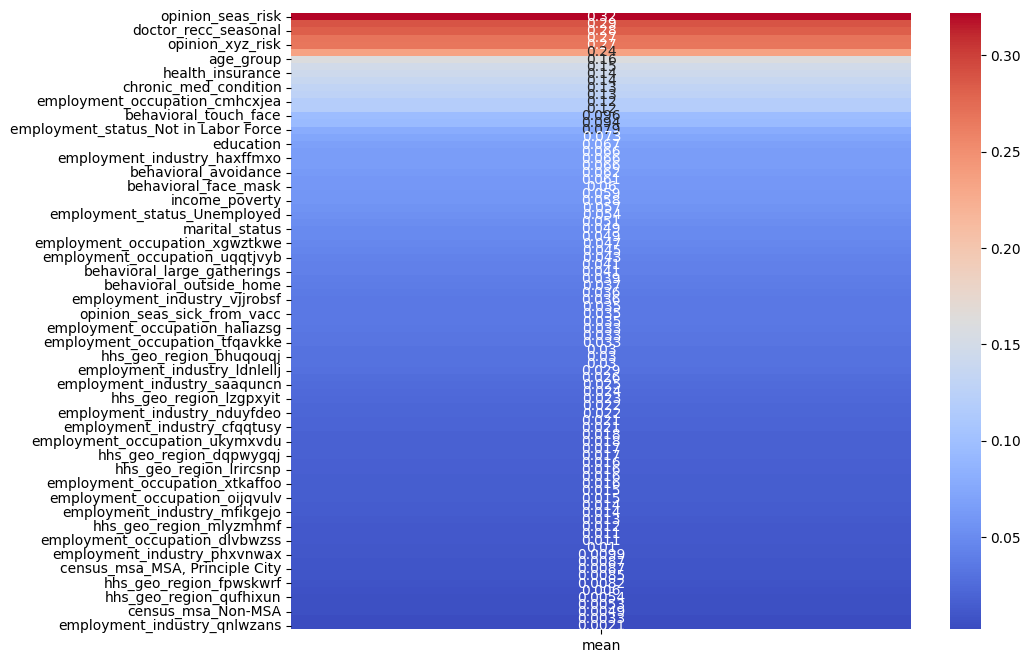

SVM XYZ Vaccine Accuracy: 0.8362036690378135
SVM Seasonal Vaccine Accuracy: 0.780980906027705
XGBoost XYZ Vaccine Accuracy: 0.8423811306626732
XGBoost Seasonal Vaccine Accuracy: 0.7723698989142643
Epoch 1/50


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7444 - loss: 0.5606 - val_accuracy: 0.8317 - val_loss: 0.3952
Epoch 2/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8090 - loss: 0.4391 - val_accuracy: 0.8388 - val_loss: 0.3844
Epoch 3/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8151 - loss: 0.4255 - val_accuracy: 0.8399 - val_loss: 0.3782
Epoch 4/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 0.4240 - val_accuracy: 0.8411 - val_loss: 0.3774
Epoch 5/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8223 - loss: 0.4160 - val_accuracy: 0.8448 - val_loss: 0.3714
Epoch 6/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8245 - loss: 0.4069 - val_accuracy: 0.8446 - val_loss: 0.3713
Epoch 7/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8192 - loss: 0.4067 - val_accuracy: 0.8446 - val_loss: 0.3705
Epoch 8/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8331 - loss: 0.3946 - val_accuracy: 0.8434 - val_

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6205 - loss: 0.6651 - val_accuracy: 0.7728 - val_loss: 0.4890
Epoch 2/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7423 - loss: 0.5401 - val_accuracy: 0.7793 - val_loss: 0.4838
Epoch 3/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7564 - loss: 0.5254 - val_accuracy: 0.7798 - val_loss: 0.4812
Epoch 4/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7625 - loss: 0.5210 - val_accuracy: 0.7828 - val_loss: 0.4764
Epoch 5/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7658 - loss: 0.5077 - val_accuracy: 0.7842 - val_loss: 0.4740
Epoch 6/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.5066 - val_accuracy: 0.7863 - val_loss: 0.4730
Epoch 7/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.5025 - val_accuracy: 0.7868 - val_loss: 0.4699
Epoch 8/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7678 - loss: 0.5076 - val_accuracy: 0.7842 - val_

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

features_df = pd.read_csv("C:/Users/Lenovo/Downloads/SummerHack/training_set_features.csv")
targets_df = pd.read_csv("C:/Users/Lenovo/Downloads/SummerHack/training_set_labels.csv")

df = pd.merge(features_df, targets_df, on='respondent_id')

age_median_map = {
    '18 - 34 Years': 26,
    '35 - 44 Years': 39.5,
    '45 - 54 Years': 49.5,
    '55 - 64 Years': 59.5,
    '65+ Years': 75
}
df['age_group'] = df['age_group'].map(age_median_map)

education_rank = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}
df['education'] = df['education'].map(education_rank)

income_rank = {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2
}
df['income_poverty'] = df['income_poverty'].map(income_rank)

df['marital_status'] = df['marital_status'].map({'Not Married': 0, 'Married': 1})
df['rent_or_own'] = df['rent_or_own'].map({'Rent': 0, 'Own': 1})

categorical_features = ['race', 'sex', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y_xyz = df['xyz_vaccine']
y_seasonal = df['seasonal_vaccine']

knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)

correlation_xyz = X_imputed.corrwith(y_xyz).abs()
correlation_seasonal = X_imputed.corrwith(y_seasonal).abs()

combined_correlation = pd.DataFrame({'xyz': correlation_xyz, 'seasonal': correlation_seasonal})
combined_correlation['mean'] = combined_correlation.mean(axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(combined_correlation[['mean']].sort_values(by='mean', ascending=False), annot=True, cmap='coolwarm')
plt.show()

threshold = 0.05
low_correlation_cols = combined_correlation[combined_correlation['mean'] < threshold].index
X_imputed.drop(columns=low_correlation_cols, inplace=True)

dropped_columns = list(low_correlation_cols)

X_train_xyz, X_test_xyz, y_train_xyz, y_test_xyz = train_test_split(X_imputed, y_xyz, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_imputed, y_seasonal, test_size=0.2, random_state=42)

numeric_features = X_imputed.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# SVM model
svm_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))])
svm_model.fit(X_train_xyz, y_train_xyz)
y_pred_xyz_svm = svm_model.predict(X_test_xyz)
print(f'SVM XYZ Vaccine Accuracy: {accuracy_score(y_test_xyz, y_pred_xyz_svm)}')

svm_model.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal_svm = svm_model.predict(X_test_seasonal)
print(f'SVM Seasonal Vaccine Accuracy: {accuracy_score(y_test_seasonal, y_pred_seasonal_svm)}')

# XGBoost model
xgb_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
xgb_model.fit(X_train_xyz, y_train_xyz)
y_pred_xyz_xgb = xgb_model.predict(X_test_xyz)
print(f'XGBoost XYZ Vaccine Accuracy: {accuracy_score(y_test_xyz, y_pred_xyz_xgb)}')

xgb_model.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal_xgb = xgb_model.predict(X_test_seasonal)
print(f'XGBoost Seasonal Vaccine Accuracy: {accuracy_score(y_test_seasonal, y_pred_seasonal_xgb)}')

# Neural Network model with Keras
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare data for neural network
X_train_nn = preprocessor.fit_transform(X_train_xyz)
X_test_nn = preprocessor.transform(X_test_xyz)

# Build and train neural network model for xyz_vaccine
nn_model_xyz = create_nn_model(X_train_nn.shape[1])
nn_model_xyz.fit(X_train_nn, y_train_xyz, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_xyz_nn = (nn_model_xyz.predict(X_test_nn) > 0.5).astype("int32")
print(f'Neural Network XYZ Vaccine Accuracy: {accuracy_score(y_test_xyz, y_pred_xyz_nn)}')

# Prepare data for neural network for seasonal_vaccine
X_train_nn = preprocessor.fit_transform(X_train_seasonal)
X_test_nn = preprocessor.transform(X_test_seasonal)

# Build and train neural network model for seasonal_vaccine
nn_model_seasonal = create_nn_model(X_train_nn.shape[1])
nn_model_seasonal.fit(X_train_nn, y_train_seasonal, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_seasonal_nn = (nn_model_seasonal.predict(X_test_nn) > 0.5).astype("int32")
print(f'Neural Network Seasonal Vaccine Accuracy: {accuracy_score(y_test_seasonal, y_pred_seasonal_nn)}')


In [40]:
from sklearn.metrics import roc_auc_score

# SVM AUC-ROC
y_pred_xyz_svm_prob = svm_model.predict_proba(X_test_xyz)[:, 1]
y_pred_seasonal_svm_prob = svm_model.predict_proba(X_test_seasonal)[:, 1]
print(f'SVM XYZ Vaccine AUC: {roc_auc_score(y_test_xyz, y_pred_xyz_svm_prob)}')
print(f'SVM Seasonal Vaccine AUC: {roc_auc_score(y_test_seasonal, y_pred_seasonal_svm_prob)}')

# XGBoost AUC-ROC
y_pred_xyz_xgb_prob = xgb_model.predict_proba(X_test_xyz)[:, 1]
y_pred_seasonal_xgb_prob = xgb_model.predict_proba(X_test_seasonal)[:, 1]
print(f'XGBoost XYZ Vaccine AUC: {roc_auc_score(y_test_xyz, y_pred_xyz_xgb_prob)}')
print(f'XGBoost Seasonal Vaccine AUC: {roc_auc_score(y_test_seasonal, y_pred_seasonal_xgb_prob)}')

# Neural Network AUC-ROC
y_pred_xyz_nn_prob = nn_model_xyz.predict(X_test_nn).ravel()
y_pred_seasonal_nn_prob = nn_model_seasonal.predict(X_test_nn).ravel()
print(f'Neural Network XYZ Vaccine AUC: {roc_auc_score(y_test_xyz, y_pred_xyz_nn_prob)}')
print(f'Neural Network Seasonal Vaccine AUC: {roc_auc_score(y_test_seasonal, y_pred_seasonal_nn_prob)}')


SVM XYZ Vaccine AUC: 0.7033137516913328
SVM Seasonal Vaccine AUC: 0.8489326813853149
XGBoost XYZ Vaccine AUC: 0.7127742900604257
XGBoost Seasonal Vaccine AUC: 0.845516431994452
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network XYZ Vaccine AUC: 0.834363680676365
Neural Network Seasonal Vaccine AUC: 0.8533883980744135


In [44]:
#We'll use only neural networks since they give best auc-roc score

test_features_df = pd.read_csv("C:/Users/Lenovo/Downloads/SummerHack/test_set_features.csv")
test_features_df['age_group'] = test_features_df['age_group'].map(age_median_map)
test_features_df['education'] = test_features_df['education'].map(education_rank)
test_features_df['income_poverty'] = test_features_df['income_poverty'].map(income_rank)

test_features_df['marital_status'] = test_features_df['marital_status'].map({'Not Married': 0, 'Married': 1})
test_features_df['rent_or_own'] = test_features_df['rent_or_own'].map({'Rent': 0, 'Own': 1})

test_features_df = pd.get_dummies(test_features_df, columns=categorical_features, drop_first=True)

respondent_ids = test_features_df['respondent_id']
X_test = test_features_df.drop(columns=['respondent_id'])

X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

missing_cols = set(X_imputed.columns) - set(X_test_imputed.columns)
for col in missing_cols:
    X_test_imputed[col] = 0

X_test_imputed = X_test_imputed[X_imputed.columns]

X_test_nn = preprocessor.transform(X_test_imputed)


xyz_probabilities = nn_model_xyz.predict(X_test_nn).flatten()
seasonal_probabilities = nn_model_seasonal.predict(X_test_nn).flatten()

results_df = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine_prob': xyz_probabilities,
    'seasonal_vaccine_prob': seasonal_probabilities
})

results_df.to_csv("vaccine_probabilities.csv", index=False)

print("Predictions saved to vaccine_probabilities.csv")


835/835 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step
835/835 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step
Predictions saved to vaccine_probabilities.csv
